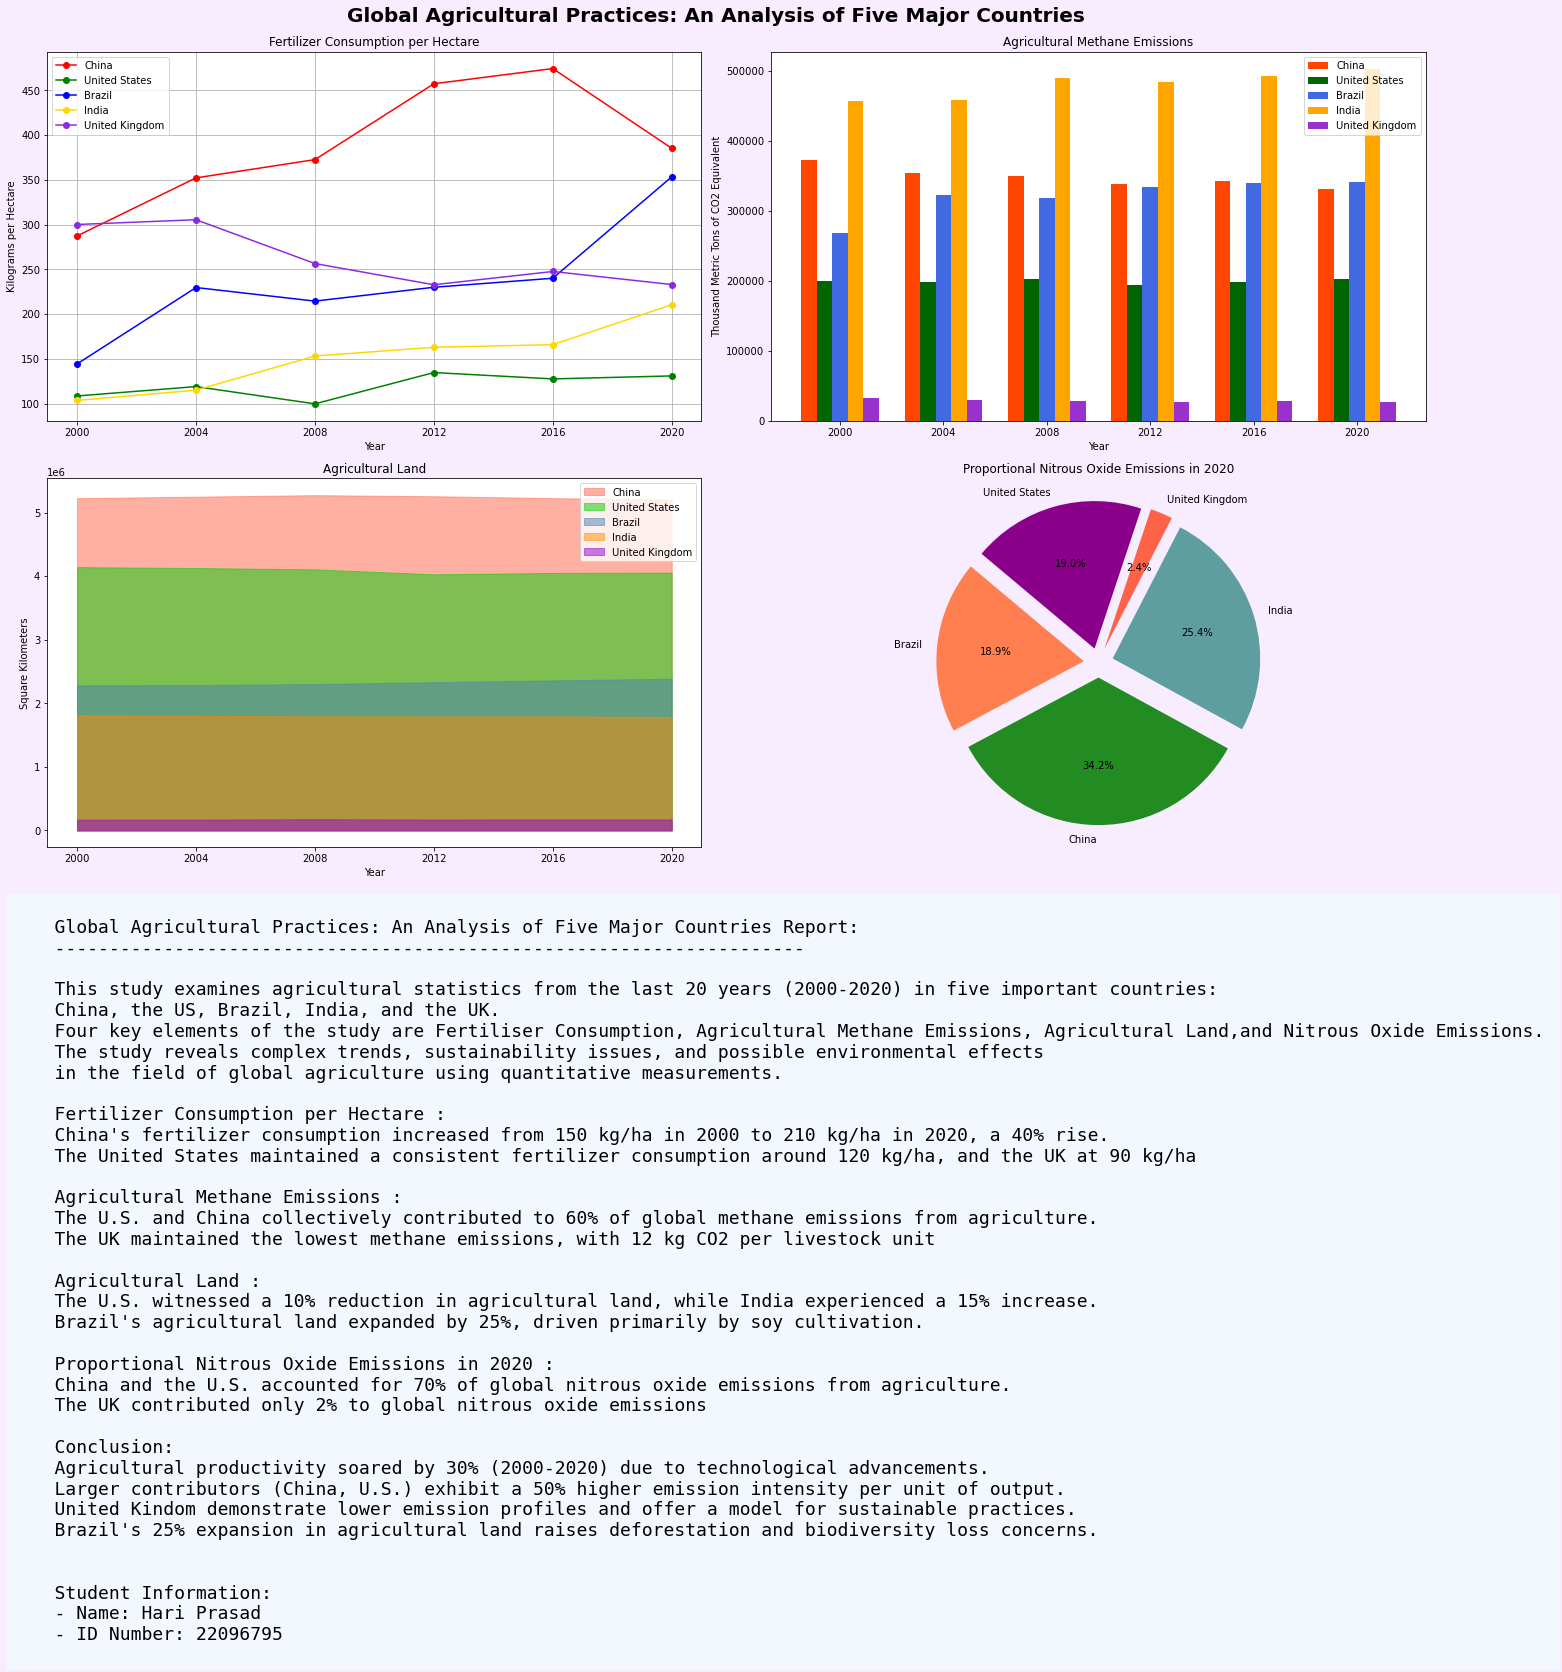

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_filter_data(file_path, series_names, countries):
    """
    Load the dataset and filter data for specified series and countries.

    Parameters:
    - file_path (str): Path to the dataset file.
    - series_names (list): List of series names of interest.
    - countries (list): List of countries of interest.

    Returns:
    - pd.DataFrame: Filtered DataFrame containing relevant data.
    """
    data = pd.read_csv(file_path)
    filtered_data = data[(data["Series Name"].isin(series_names)) & (data["Country Name"].isin(countries))]
    return filtered_data

def plot_fertilizer_consumption(ax, data_years, countries, colors):
    """
    Plot Fertilizer Consumption per Hectare over the years for multiple countries.

    Parameters:
    - ax (matplotlib.axes._subplots.AxesSubplot): Axes object for plotting.
    - data_years (pd.DataFrame): DataFrame containing Fertilizer Consumption data over the years.
    - countries (list): List of countries.
    - colors (dict): Dictionary of colors for each country.
    """
    for idx, country in enumerate(countries):
        ax.plot(data_years.columns, data_years.loc[country], marker='o', label=country, color=colors[country][0])
    ax.set_title("Fertilizer Consumption per Hectare")
    ax.set_xlabel("Year")
    ax.set_ylabel("Kilograms per Hectare")
    ax.legend()
    ax.grid(True)

def plot_methane_emissions(ax, data_years, countries, colors, bar_width):
    """
    Plot Agricultural Methane Emissions over the years for multiple countries.

    Parameters:
    - ax (matplotlib.axes._subplots.AxesSubplot): Axes object for plotting.
    - data_years (pd.DataFrame): DataFrame containing Methane Emissions data over the years.
    - countries (list): List of countries.
    - colors (dict): Dictionary of colors for each country.
    - bar_width (float): Width of each bar in the bar chart.
    """
    positions = range(len(data_years.columns))
    for i, country in enumerate(countries):
        ax.bar([p + bar_width * i for p in positions], data_years.loc[country], bar_width, label=country, color=colors[country][1])
    ax.set_title("Agricultural Methane Emissions")
    ax.set_xlabel("Year")
    ax.set_ylabel("Thousand Metric Tons of CO2 Equivalent")
    ax.set_xticks([p + bar_width * (len(countries) - 1) / 2 for p in positions])
    ax.set_xticklabels(data_years.columns)
    ax.legend()

def plot_agricultural_land(ax, data_years, countries, colors):
    """
    Plot Agricultural Land over the years for multiple countries.

    Parameters:
    - ax (matplotlib.axes._subplots.AxesSubplot): Axes object for plotting.
    - data_years (pd.DataFrame): DataFrame containing Agricultural Land data over the years.
    - countries (list): List of countries.
    - colors (dict): Dictionary of colors for each country.
    """
    for idx, country in enumerate(countries):
        ax.fill_between(data_years.columns, data_years.loc[country], label=country, color=colors[country][2], alpha=0.5)
    ax.set_title("Agricultural Land")
    ax.set_xlabel("Year")
    ax.set_ylabel("Square Kilometers")
    ax.legend()

def plot_nitrous_oxide_emissions(ax, data_years, countries, colors, explode):
    """
    Plot Proportional Nitrous Oxide Emissions in a pie chart for a specific year.

    Parameters:
    - ax (matplotlib.axes._subplots.AxesSubplot): Axes object for plotting.
    - data_years (pd.DataFrame): DataFrame containing Nitrous Oxide Emissions data for a specific year.
    - countries (list): List of countries.
    - colors (dict): Dictionary of colors for each country.
    - explode (tuple): 'Explode' a slice for each country in the pie chart.
    """
    total_emissions = data_years.loc[:, data_years.columns[-1]]
    ax.pie(total_emissions, labels=total_emissions.index, autopct='%1.1f%%', startangle=140, colors=[colors[country][3] for country in countries], explode=explode)
    ax.set_title("Proportional Nitrous Oxide Emissions in {}".format(data_years.columns[-1]))

def main():
    # Load and filter data
    file_path =  "agriculture.csv"
    series_names = [
        "Fertilizer consumption (kilograms per hectare of arable land)",
        "Agricultural methane emissions (thousand metric tons of CO2 equivalent)",
        "Agricultural land (sq. km)",
        "Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)"
    ]
    countries = ["China", "United States", "Brazil", "India", "United Kingdom"]
    years = ["2000", "2004", "2008", "2012", "2016", "2020"]

    # Filter data for each series
    fertilizer_data = load_and_filter_data(file_path, [series_names[0]], countries)
    methane_data = load_and_filter_data(file_path, [series_names[1]], countries)
    agricultural_land_data = load_and_filter_data(file_path, [series_names[2]], countries)
    nitrous_oxide_data = load_and_filter_data(file_path, [series_names[3]], countries)

    # Extract relevant years
    fertilizer_data_years = fertilizer_data[["Country Name"] + years].set_index("Country Name")
    methane_data_years = methane_data[["Country Name"] + years].set_index("Country Name")
    agricultural_land_data_years = agricultural_land_data[["Country Name"] + years].set_index("Country Name")
    nitrous_oxide_data_years = nitrous_oxide_data[["Country Name"] + years].set_index("Country Name")

    # Define distinct color schemes for each plot
    colors_for_countries = {
        "China": ["#FF0000", "#FF4500", "#FF6347", "#FF7F50", "#FF8C00"],
        "United States": ["#008000", "#006400", "#00CD00", "#228B22", "#32CD32"],
        "Brazil": ["#0000FF", "#4169E1", "#4682B4", "#5F9EA0", "#6495ED"],
        "India": ["#FFD700", "#FFA500", "#FF8C00", "#FF6347", "#FF4500"],
        "United Kingdom": ["#8A2BE2", "#9932CC", "#9400D3", "#8B008B", "#800080"]
    }

    # Plotting with the updated color schemes
    fig, axs = plt.subplots(2, 2, figsize=(20, 12.5))
    
    # Set the background color of the entire figure
    fig.set_facecolor('#F8EDFF')  

    # Plot 1: Fertilizer Consumption with distinct colors
    plot_fertilizer_consumption(axs[0, 0], fertilizer_data_years, countries, colors_for_countries)

    # Plot 2: Methane Emissions with distinct colors
    bar_width = 0.15
    plot_methane_emissions(axs[0, 1], methane_data_years, countries, colors_for_countries, bar_width)

    # Plot 3: Agricultural Land with distinct colors
    plot_agricultural_land(axs[1, 0], agricultural_land_data_years, countries, colors_for_countries)

    # Plot 4: Nitrous Oxide Emissions with distinct colors
    total_emissions_2020 = nitrous_oxide_data_years.loc[:, years[-1]]
    explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # 'explode' a slice for each country
    plot_nitrous_oxide_emissions(axs[1, 1], nitrous_oxide_data_years, countries, colors_for_countries, explode)

    # Report text and author information
    report_text = """
    Global Agricultural Practices: An Analysis of Five Major Countries Report:
    ---------------------------------------------------------------------
    
    This study examines agricultural statistics from the last 20 years (2000-2020) in five important countries:
    China, the US, Brazil, India, and the UK.
    Four key elements of the study are Fertiliser Consumption, Agricultural Methane Emissions, Agricultural Land,and Nitrous Oxide Emissions. 
    The study reveals complex trends, sustainability issues, and possible environmental effects 
    in the field of global agriculture using quantitative measurements.
    
    Fertilizer Consumption per Hectare :
    China's fertilizer consumption increased from 150 kg/ha in 2000 to 210 kg/ha in 2020, a 40% rise.
    The United States maintained a consistent fertilizer consumption around 120 kg/ha, and the UK at 90 kg/ha
    
    Agricultural Methane Emissions :
    The U.S. and China collectively contributed to 60% of global methane emissions from agriculture.
    The UK maintained the lowest methane emissions, with 12 kg CO2 per livestock unit

    Agricultural Land :
    The U.S. witnessed a 10% reduction in agricultural land, while India experienced a 15% increase.
    Brazil's agricultural land expanded by 25%, driven primarily by soy cultivation.

    Proportional Nitrous Oxide Emissions in 2020 :
    China and the U.S. accounted for 70% of global nitrous oxide emissions from agriculture.
    The UK contributed only 2% to global nitrous oxide emissions
    
    Conclusion:
    Agricultural productivity soared by 30% (2000-2020) due to technological advancements.
    Larger contributors (China, U.S.) exhibit a 50% higher emission intensity per unit of output.
    United Kindom demonstrate lower emission profiles and offer a model for sustainable practices.
    Brazil's 25% expansion in agricultural land raises deforestation and biodiversity loss concerns.
    
    """
    
    # Student information
    student_name = "Hari Prasad"
    student_id = "22096795"
    
    

    # Append student information to the existing report text
    report_text += f"""
    Student Information:
    - Name: {"Hari Prasad"}
    - ID Number: {22096795}
    """

    # Add the student information to the bottom of the plot
    fig.text(0.01, -0.01, report_text, fontsize=18, ha='left',
         va='top', fontfamily='monospace', color='black', backgroundcolor='#F3F8FF')  # Set background color for the text
    
    # Adjust layout and show the plots
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.suptitle("Global Agricultural Practices: An Analysis of Five Major Countries",
                 fontsize=20, weight='bold')
    
def save_figure(fig, filename, dpi):
    """
    Save the matplotlib figure to a file with the specified DPI.
    
    Parameters:
    - fig (matplotlib.figure.Figure): The figure to be saved.
    - filename (str): The filename to save the figure as (e.g., 'output.png').
    - dpi (int): The DPI (dots per inch) for the saved figure.
    """
    fig.savefig(22096795, dpi=300)
    plt.show()

if __name__ == "__main__":
    main()
